<h1 align="center">Principal Component Analysis (PCA)</h1>
<hr>

# Links
#### [3Blue1Brown Linear Algebra Video Playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
#### [Setosa EigenVectors and EigenValues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
#### [Setosa PCA](http://setosa.io/ev/principal-component-analysis/)
#### [PCA Overview](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
#### [PCA -- Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/train.csv')

In [3]:
X = ds.values[:, 1:]
labels = ds.values[:, 0]
print(X.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [5]:
X_std = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-03) # Standardizing the data
print(X_std.shape)

mean = np.mean(X_std, axis=0)
print(mean.shape)

(42000, 784)
(784,)


In [8]:
cov = np.cov(X_std, rowvar=False)
print(cov.shape)

(784, 784)


In [9]:
cov[100:,100:]

array([[0.99998378, 0.76790152, 0.40754608, ..., 0.        , 0.        ,
        0.        ],
       [0.76790152, 0.99998142, 0.76059196, ..., 0.        , 0.        ,
        0.        ],
       [0.40754608, 0.76059196, 0.99997677, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
print(mean[400:410])
print(cov[510:515, 510:515])

[ 5.33329994e-17 -6.09036631e-18 -3.11708331e-17  5.33752936e-17
  6.55560262e-18 -1.08696121e-17  4.77924578e-17  6.63173220e-17
 -1.52259158e-17  1.87786294e-17]
[[0.99999858 0.76557687 0.40881585 0.14582154 0.02857417]
 [0.76557687 1.00000165 0.76155178 0.39940025 0.15539897]
 [0.40881585 0.76155178 1.00000308 0.75886348 0.41042703]
 [0.14582154 0.39940025 0.75886348 1.00000383 0.76714196]
 [0.02857417 0.15539897 0.41042703 0.76714196 1.00000435]]


In [13]:
eigen = np.linalg.eig(cov)
eigen_values, eigen_vectors = eigen
# print(eigen[0])
print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[:10], eigen_vectors[:5])

(784,) (784, 784)
[40.69537351 29.11041321 26.7824754  20.81403518 18.09952427 15.78714241
 13.82359513 12.54272145 11.0633458  10.08842803] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


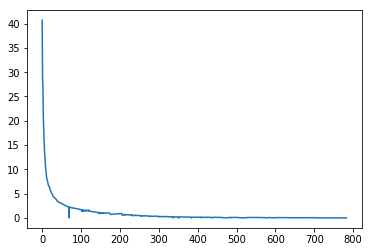

In [12]:
plt.figure()
plt.plot(eigen_values)
plt.show()

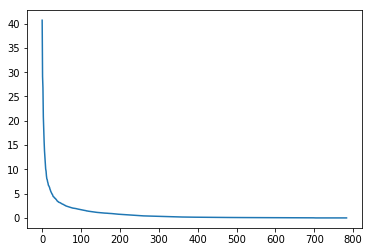

In [14]:
plt.figure()
plt.plot(sorted(eigen_values, reverse=True))
plt.show()

In [20]:
sorted(eigen_values[:20], reverse=True)

[40.695373510677456,
 29.11041320994042,
 26.782475402618086,
 20.814035180517923,
 18.099524269009116,
 15.787142408885547,
 13.823595131453427,
 12.54272144959714,
 11.063345799114199,
 10.088428029637273,
 9.635671525398434,
 8.65503342142047,
 8.040638133373745,
 7.880458529941805,
 7.435782842205296,
 7.166919444903985,
 6.734663462044155,
 6.616017964166304,
 6.422852968540045,
 6.267534335694192]

In [15]:
eigen_vectors[:, 337]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.55166586e-01,  3.33333430e-01,  5.28214964e-01, -7.38080522e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.62266626e-15,  1.17330226e-15,  7.74919488e-17, -3.18398569e-18,
       -7.28955542e-16,  6.63708467e-16, -2.62051348e-15,  4.26884707e-15,
       -6.65561021e-15,  9.62251895e-15, -1.33104322e-14,  5.78391707e-15,
       -2.73002205e-15,  1.43478363e-15, -7.68297824e-16,  4.97603854e-16,
       -3.95170815e-16,  4.05182363e-16, -1.97140353e-16,  3.24661919e-17,
        0.00000000e+00,  

In [22]:
eigen_zipped = zip(eigen_values,eigen_vectors)
eigen_zipped = list(eigen_zipped)
print(len(eigen_zipped))
print(eigen_zipped[100][0])

784
1.7076314529083398


In [23]:
eigen_sorted = sorted(eigen_zipped, key=lambda x: x[0], reverse=True)
eigen_sorted[100]

(1.6811848524258872,
 array([ 1.38519829e-02, -3.43187646e-02,  2.46262618e-02,  7.44064166e-02,
         5.48419391e-02,  1.66377417e-02, -3.43900435e-02, -3.40923237e-02,
        -2.80687099e-04, -5.24930443e-02,  2.94645388e-02, -3.06485882e-02,
        -1.25153533e-02, -5.19124237e-02,  2.53671843e-02,  1.39001546e-02,
         1.24297611e-02, -2.19832453e-02, -5.59556488e-03,  1.63533864e-02,
        -4.18891193e-02,  5.96600849e-02, -9.20606277e-02,  3.82515090e-02,
        -1.17855292e-02,  4.98109601e-02,  7.96797018e-02,  1.88878756e-02,
         2.73931807e-02,  3.66477955e-02,  4.97751863e-02, -2.04636184e-02,
         1.19593248e-02,  9.05566329e-03,  7.55157729e-02,  6.36314385e-02,
         6.44590048e-03,  1.44129161e-02, -4.23304129e-02, -9.23196824e-04,
        -4.81736769e-02,  4.92710557e-02, -1.68201023e-02, -8.42881937e-02,
        -4.65615707e-02, -1.00421428e-01, -3.23097947e-02,  5.33271902e-02,
        -1.92951034e-02,  1.55121603e-02,  1.62656325e-02,  3.15305

In [24]:
eigen_values, eigen_vectors = list(), list()
for lam, vec in eigen_sorted:
    eigen_values.append(lam)
    eigen_vectors.append(vec)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)

print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[100])
print(eigen_vectors[100])

(784,) (784, 784)
1.6811848524258872
[ 1.38519829e-02 -3.43187646e-02  2.46262618e-02  7.44064166e-02
  5.48419391e-02  1.66377417e-02 -3.43900435e-02 -3.40923237e-02
 -2.80687099e-04 -5.24930443e-02  2.94645388e-02 -3.06485882e-02
 -1.25153533e-02 -5.19124237e-02  2.53671843e-02  1.39001546e-02
  1.24297611e-02 -2.19832453e-02 -5.59556488e-03  1.63533864e-02
 -4.18891193e-02  5.96600849e-02 -9.20606277e-02  3.82515090e-02
 -1.17855292e-02  4.98109601e-02  7.96797018e-02  1.88878756e-02
  2.73931807e-02  3.66477955e-02  4.97751863e-02 -2.04636184e-02
  1.19593248e-02  9.05566329e-03  7.55157729e-02  6.36314385e-02
  6.44590048e-03  1.44129161e-02 -4.23304129e-02 -9.23196824e-04
 -4.81736769e-02  4.92710557e-02 -1.68201023e-02 -8.42881937e-02
 -4.65615707e-02 -1.00421428e-01 -3.23097947e-02  5.33271902e-02
 -1.92951034e-02  1.55121603e-02  1.62656325e-02  3.15305049e-03
 -3.42698836e-02  2.10958688e-03 -3.03884142e-03 -4.91129013e-02
 -1.22695601e-02 -4.91076186e-02  3.14496048e-02  2.8

In [25]:
eigen_values[:10]

array([40.69537351, 29.11041321, 26.7824754 , 20.81403518, 18.09952427,
       15.78714241, 13.82359513, 12.54272145, 11.0633458 , 10.08842803])

In [26]:
eigen_cumulative = np.cumsum(eigen_values) / eigen_values.sum()
print(eigen_cumulative.shape)
print(eigen_cumulative[:10])

(784,)
[0.05752403 0.0986724  0.13653017 0.16595138 0.19153555 0.21385111
 0.23339115 0.25112063 0.26675897 0.28101924]


In [34]:
eigen_cumulative[400]

0.9718373781481076

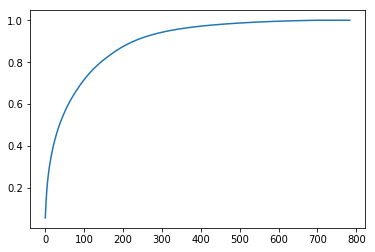

In [35]:
plt.figure()
plt.plot(eigen_cumulative)
plt.show()

In [36]:
def get_k(info=0.95):
    k = 0
    for i in range(eigen_cumulative.shape[0]):
        k = i
        if eigen_cumulative[i] >= info:
            break
    return k

In [38]:
get_k(0.95)

319

In [44]:
def explain_variances(at=None):
    if at is None:
        at = int(eigen_cumulative.shape[0] / 2)
        
    explained = eigen_cumulative[at]
    loss = (1 - explained)
    
#     print("--- At {} ---".format(at))
#     print("Variances Explained: ", explained * 100, '%')
#     print("Loss: ", loss * 100, '%')
    return explained, loss

In [41]:
explain_variances(319)

--- At 319 ---
Variances Explained:  95.00867038583051 %
Loss:  4.9913296141694925 %


(0.9500867038583051, 0.04991329614169493)

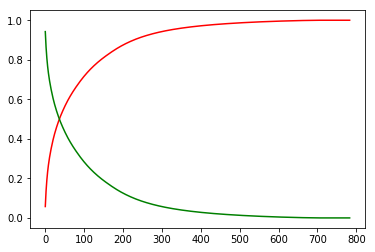

In [45]:
explained =  [explain_variances(i)[0] for i in range(784)]
loss = [explain_variances(i)[1] for i in range(784)]
plt.figure()
plt.plot(explained, 'r')
plt.plot(loss, 'g')
plt.show()

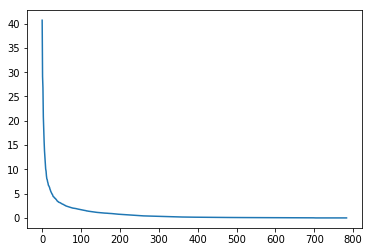

In [46]:
plt.figure()
plt.plot(eigen_values[:])
plt.show()

In [47]:
# Select top k dimensions

k = get_k(info=0.955)
dim = eigen_values.shape[0]
print(k, dim)

334 784


In [48]:
top_k_components = []

for i in range(k):
    top_k_components.append(eigen_vectors[:, i].reshape(dim, 1))
    
mat_W = np.hstack(top_k_components)

In [49]:
eigen_vectors[:,0].shape

(784,)

In [50]:
print(mat_W.shape)
print(X_std.shape)

(784, 334)
(42000, 784)


In [51]:
y = X_std.dot(mat_W)
print(y.shape)

(42000, 334)


In [52]:
y[0]

array([-3.00950777e+00, -6.21237785e-01,  8.50666676e-01, -4.71071052e-01,
       -1.81208594e+00,  9.18032166e-01, -3.19641725e-01,  1.64099096e+00,
        1.58020371e-01,  2.43690339e+00,  4.48292418e-01,  2.56065236e-01,
       -1.46619267e+00, -3.12057880e-01,  1.32343988e+00,  1.69692352e+00,
       -2.69048401e-01, -8.85931514e-01, -4.60115414e-01,  3.54070545e-02,
        8.52645338e-01,  5.90193235e-01, -2.53718968e-01, -6.51359845e-01,
        4.88853167e-02, -1.20844991e-01, -3.24749775e-01, -5.98838325e-01,
       -1.31982242e+00, -6.43758456e-01, -1.00358701e+00, -8.00556424e-01,
       -2.79766203e-02,  6.97450101e-01,  3.66758609e-01, -1.78803848e+00,
        9.33858404e-02,  5.06241617e-01,  7.78240610e-01,  9.91850581e-01,
        3.28365580e-02,  4.95978754e-01, -5.04641078e-01, -4.57797532e-01,
        1.27382026e+00,  1.00508988e+00,  2.25830152e+00,  8.13766833e-01,
       -4.19008519e-01, -4.86700439e-01,  5.30036896e-01, -9.75347413e-01,
        3.91774720e-01,  

# SKLearn

In [53]:
from sklearn.decomposition import PCA
import datetime

In [62]:
explain_variances(2)

(0.1365301668653084, 0.8634698331346916)

In [59]:
t0 = datetime.datetime.now()
pca = PCA(n_components=2)
X_sk = pca.fit_transform(X_std)
print("Time Taken: ", datetime.datetime.now() - t0)

Time Taken:  0:00:02.126371


In [56]:
X_sk[0].shape

(339,)

In [57]:
var = pca.explained_variance_ratio_
cumulative  = np.cumsum(var) / np.sum(var)

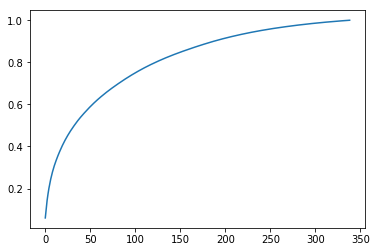

In [58]:
plt.figure()
plt.plot(cumulative)
plt.show()

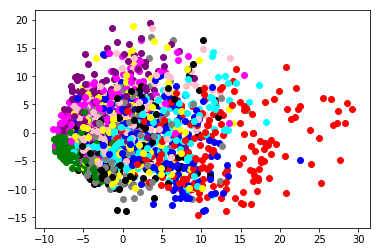

In [60]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(2000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()

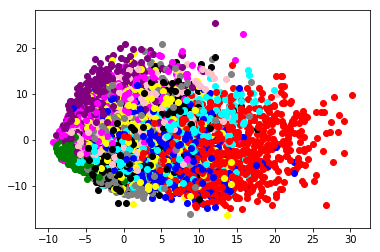

In [61]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()